# Gradiant Boosting Classifier

Gradient Boosting is a functional gradient algorithm that repeatedly selects
 a function that leads in the direction of a weak hypothesis or negative
 gradient so that it can minimize a loss function.

## 'Label' Feature

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scripts import preprocess as ref

ORIGINAL_CSV = '../data/UNSW-NB15-BALANCED-TRAIN.csv'

origin = pd.read_csv(ORIGINAL_CSV, encoding='ISO-8859-1', low_memory=False)
df = ref.preprocess_data(origin)

df['srcip'] = pd.factorize(df['srcip'])[0]
df['dstip'] = pd.factorize(df['dstip'])[0]

In [31]:
x_Label = df.drop(['attack_cat', 'Label'], axis=1)
y_Label = df['Label']

# Train model with 30% of data will be used as a test model
x_Label_train, x_Label_test, y_Label_train, y_Label_test = train_test_split(x_Label,
                                                    y_Label,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=y_Label,
                                                    random_state=42)


In [32]:
from sklearn.ensemble import GradientBoostingClassifier


# Default: max_depth=3, learning_rate=0.1
gbc_Label = GradientBoostingClassifier(max_depth=3, random_state=0)
gbc_Label.fit(x_Label_train, y_Label_train)

# Train set accuracy
score_train_Label = gbc_Label.score(x_Label_train, y_Label_train)
print('{:.3f}'.format(score_train_Label))

# Generalization accuracy
score_test_Label = gbc_Label.score(x_Label_test, y_Label_test)
print('{:.3f}'.format(score_test_Label))


0.993
0.993


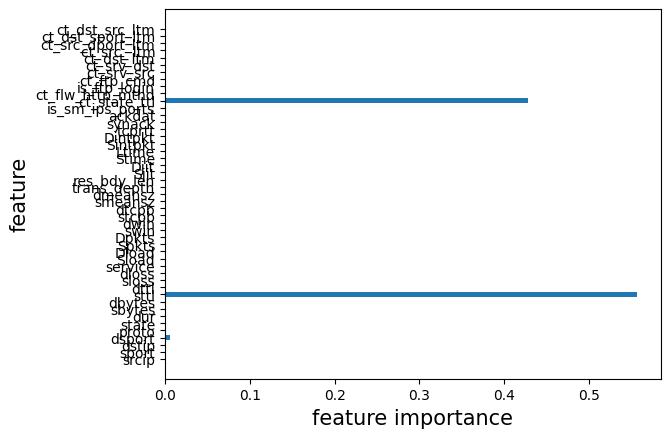

<Figure size 1000x1000 with 0 Axes>

In [33]:
n_feature_Label = x_Label.shape[1]
index_Label = np.arange(n_feature_Label)
plt.barh(index_Label, gbc_Label.feature_importances_, align='center')
plt.yticks(index_Label, x_Label)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.figure(figsize=(8,6))
plt.show()

## 'Attack_cat' Feature

In [34]:
x_attack_cat = df.drop(['attack_cat', 'Label'], axis=1)
y_attack_cat = df['attack_cat']

# Train model with 30% of data will be used as a test model
x_attack_cat_train, x_attack_cat_test, y_attack_cat_train, y_attack_cat_test\
                                        = train_test_split(x_attack_cat,
                                                            y_attack_cat,
                                                            test_size=0.3,
                                                            shuffle=True,
                                                            stratify=y_attack_cat,
                                                            random_state=42)


In [35]:
# Default: max_depth=3, learning_rate=0.1
gbc_attack_cat = GradientBoostingClassifier(max_depth=3, random_state=0)
gbc_attack_cat.fit(x_attack_cat_train, y_attack_cat_train)

# Train set accuracy
score_train_attack_cat = gbc_attack_cat.score(x_attack_cat_train, y_attack_cat_train)
print('{:.3f}'.format(score_train_attack_cat))

# Generalization accuracy
score_test_attack_cat = gbc_attack_cat.score(x_attack_cat_test, y_attack_cat_test)
print('{:.3f}'.format(score_test_attack_cat))

0.918
0.916


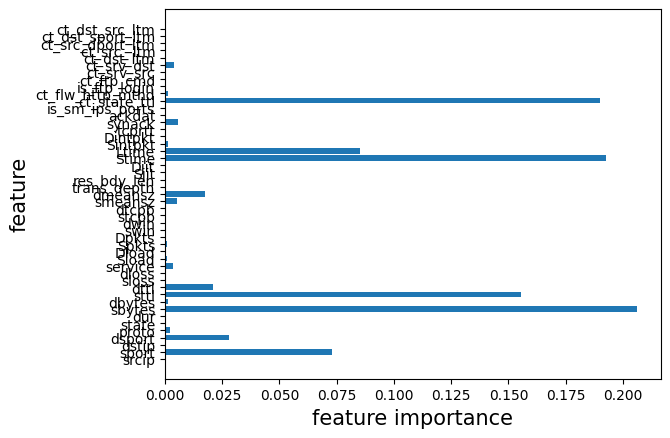

<Figure size 1000x1000 with 0 Axes>

In [36]:
n_feature_attack_cat = x_attack_cat.shape[1]
index_attack_cat = np.arange(n_feature_attack_cat)
plt.barh(index_attack_cat, gbc_attack_cat.feature_importances_, align='center')
plt.yticks(index_attack_cat, x_attack_cat)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.figure(figsize=(8,6))
plt.show()